# Prepare our data

**import library dan download resource nltk**


In [ ]:
import pandas as pd
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/acruz2332/datasets/main/depression_dataset_reddit_cleaned.csv')
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [ ]:
df.tail()

,clean_text,is_depression
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0
7730,slept wonderfully finally tried swatching for ...,0


In [ ]:
df['is_depression'].value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

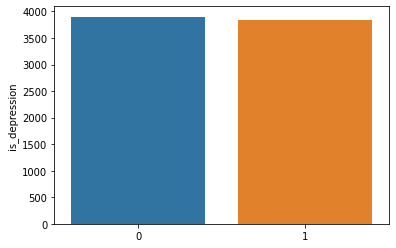

In [ ]:
sns.barplot(x=df['is_depression'].value_counts().index, y=df['is_depression'].value_counts())

# preprocessing teks

In [ ]:
lmt = nltk.stem.WordNetLemmatizer()
kalimat = []

In [ ]:
#melakukan teks prosesing
for i in range(len(df.clean_text)):
  #menghilangkan semua simbol pada teks dan membuat teks lowercase
  teks = re.sub("[^a-zA-Z]"," ",df.clean_text[i])
  teks = teks.lower()
  #tokenisasi kata menggunakan library nltk
  teks = nltk.word_tokenize(teks)
  #melakukan lemmization menggunakan list comprehension sembari menghilangkan stopwords
  tekss = [lmt.lemmatize(word, 'v') for word in teks if word not in stopwords.words('english')]
  teks = " ".join(tekss)
  df.clean_text[i] = teks
  kalimat.append(teks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


# embedding or encoding

**count vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# panggil model

In [ ]:
from sklearn.model_selection import train_test_split

**svm**

In [ ]:
from sklearn import svm

In [ ]:
SVM1 = svm.SVC()

# memasukkan data uji

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/acruz2332/datasets/main/copy%20sample%20gemastik%20-%20Form%20Responses%201%20(4).csv')
df_test = df_test.drop(df_test.columns[0], axis=1)
df_test

,is_deppresion,text
0,0,Karena saya pribadi yang jarang sekali memilik...
1,0,"karena tidak bisa mengatur waktu dengan baik, ..."
2,1,Pada saat saya kehilangan ibu saya ketika saya...
3,1,Terkadang saya terlalu terbawa dengan permasal...
4,1,Terkadang di masa perkuliahan ini memang serin...
5,1,Pada akhir bulan Juni ada seseorang yang menin...
6,1,"Waktu itu saya pernah mengalami depresi, karen..."
7,1,"Subhanallah, waktu sebelumnya kan luring yaa, ..."
8,1,"Di masa SMA saya, pada saat itu saya mengalami..."
9,0,"tidak terlalu memikirkan suatu hal, semuanya d..."


In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 1.4 MB 33.5 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=ce9e704ed82f5b6e561e885fddd50e28a84deb89dc93f8a1ef13f28f8c1c7558
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

for i in range(len(df_test)):
  translated_text = translator.translate(df_test.text[i], dest='en')
  df_test.text[i] = translated_text.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_test

,is_deppresion,text
0,0,Because I personally rarely have high expectat...
1,0,"because you can't manage your time well, espec..."
2,1,When I lost my mother when I was trying to ent...
3,1,Sometimes I get too carried away with the prob...
4,1,"Sometimes during this lecture period, assignme..."
5,1,At the end of June someone died. It left me de...
6,1,"At that time I had experienced depression, bec..."
7,1,"Subhanallah, the previous time it was offline,..."
8,1,"In my high school days, at that time I experie..."
9,0,"don't really think about anything, everything ..."


**cleaning the data**

In [ ]:
kalimat_test = []

In [ ]:
#melakukan teks prosesing
for i in range(len(df_test.text)):
  #menghilangkan semua simbol pada teks dan membuat teks lowercase
  teks = re.sub("[^a-zA-Z]"," ",df_test.text[i])
  teks = teks.lower()
  #tokenisasi kata menggunakan library nltk
  teks = nltk.word_tokenize(teks)
  #melakukan lemmization menggunakan list comprehension sembari menghilangkan stopwords
  tekss = [lmt.lemmatize(word, 'v') for word in teks if word not in stopwords.words('english')]
  teks = " ".join(tekss)
  df_test.text[i] = teks
  kalimat_test.append(teks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


# preprocessing, adding data to datasets

In [ ]:
for i in range(len(df_test)):
  df.loc[len(df.index)] = [df_test.text[i], df_test.is_deppresion[i]] 
  kalimat.append(df_test.text[i])

In [ ]:
embed_fixed = vectorizer.fit_transform(kalimat).toarray()
embed_fixed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df.tail(len(df_test))

,clean_text,is_depression
7731,personally rarely high expectations everything,0
7732,manage time well especially get enough sleep,0
7733,lose mother try enter university time felt con...,1
7734,sometimes get carry away problems face problem...,1
7735,sometimes lecture period assignments often giv...,1
7736,end june someone die leave devastate sad becom...,1
7737,time experience depression repeat failures go ...,1
7738,subhanallah previous time offline suddenly com...,1
7739,high school days time experience undesirable e...,1
7740,really think anything everything take relax,0


In [ ]:
#train buat pengujian data kita
X, X_form, y, y_form = train_test_split(embed_fixed, df.is_depression, shuffle=False, test_size=len(df_test))

In [ ]:
y_form

7731    0
7732    0
7733    1
7734    1
7735    1
7736    1
7737    1
7738    1
7739    1
7740    0
7741    1
7742    1
7743    1
7744    1
7745    1
7746    1
7747    1
7748    0
7749    1
7750    0
7751    0
7752    0
7753    0
7754    1
7755    1
7756    1
7757    0
7758    1
7759    0
7760    0
7761    0
7762    0
7763    0
7764    1
7765    0
7766    0
7767    0
7768    0
7769    0
7770    0
Name: is_depression, dtype: int64

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7726    0
7727    0
7728    0
7729    0
7730    0
Name: is_depression, Length: 7731, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
SVM1.fit(X_train, y_train)

SVC()

In [ ]:
SVM1.score(X_test, y_test)

0.9508620689655173

In [ ]:
from sklearn.model_selection import cross_val_score
scoress = cross_val_score(SVM1, X_test, y_test, cv=5)

In [ ]:
scoress.mean()

0.9413793103448276

In [ ]:
SVM1.score(X_form, y_form)

0.8

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


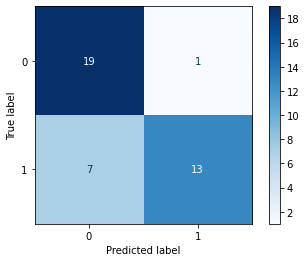

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM1, X_form, y_form, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
ypred_test = SVM1.predict(X_form)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_form, ypred_test))
print(confusion_matrix(y_form, ypred_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.93      0.65      0.76        20

    accuracy                           0.80        40
   macro avg       0.83      0.80      0.80        40
weighted avg       0.83      0.80      0.80        40

[[19  1]
 [ 7 13]]


In [ ]:
svm_prec = "{:.2f}".format(precision_score(y_form, ypred_test, average='macro'))
svm_rec = "{:.2f}".format(recall_score(y_form, ypred_test, average='macro'))
svm_f1 = "{:.2f}".format(f1_score(y_form, ypred_test, average='macro'))

print(svm_prec)
print(svm_rec)
print(svm_f1)

0.83
0.80
0.80


In [ ]:
svm_acc = "{:.2f}".format(accuracy_score(y_form, ypred_test))
svm_acc

'0.80'

# Membandingkan algoritma

**naive bayes algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()

In [ ]:
nb_train = NB.fit(X_train, y_train)

In [ ]:
nb_train.score(X_test, y_test)

0.853448275862069

In [ ]:
nb_train.score(X_form, y_form)

0.675

In [ ]:
ypred_nb = nb_train.predict(X_form)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_form, ypred_nb))
print(confusion_matrix(y_form, ypred_nb))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40

[[12  8]
 [ 5 15]]


In [ ]:
nb_prec = "{:.2f}".format(precision_score(y_form, ypred_nb, average='macro'))
nb_rec = "{:.2f}".format(recall_score(y_form, ypred_nb, average='macro'))
nb_f1 = "{:.2f}".format(f1_score(y_form, ypred_nb, average='macro'))

print(nb_prec)
print(nb_rec)
print(nb_f1)

0.68
0.68
0.67


In [ ]:
nb_acc = "{:.2f}".format(accuracy_score(y_form, ypred_nb))
nb_acc

'0.68'

**random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_train = rf.fit(X_train, y_train)

In [ ]:
rf_train.score(X_train, y_train)

0.9998151912770282

In [ ]:
rf_train.score(X_form, y_form)

0.7

In [ ]:
ypred_rf = rf_train.predict(X_form)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_form, ypred_rf))
print(confusion_matrix(y_form, ypred_rf))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.83      0.50      0.62        20

    accuracy                           0.70        40
   macro avg       0.74      0.70      0.69        40
weighted avg       0.74      0.70      0.69        40

[[18  2]
 [10 10]]


In [ ]:
rf_prec = "{:.2f}".format(precision_score(y_form, ypred_rf, average='macro'))
rf_rec = "{:.2f}".format(recall_score(y_form, ypred_rf, average='macro'))
rf_f1 = "{:.2f}".format(f1_score(y_form, ypred_rf, average='macro'))

print(rf_prec)
print(rf_rec)
print(rf_f1)

0.74
0.70
0.69


In [ ]:
rf_acc = "{:.2f}".format(accuracy_score(y_form, ypred_rf))
rf_acc

'0.70'

**knn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_train = knn.fit(X_train, y_train)

In [ ]:
knn_train.score(X_train, y_train)

0.8273886527444095

In [ ]:
knn_train.score(X_form, y_form)

0.475

In [ ]:
ypred_knn = knn_train.predict(X_form)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_form, ypred_knn))
print(confusion_matrix(y_form, ypred_knn))

              precision    recall  f1-score   support

           0       0.49      0.85      0.62        20
           1       0.40      0.10      0.16        20

    accuracy                           0.48        40
   macro avg       0.44      0.47      0.39        40
weighted avg       0.44      0.47      0.39        40

[[17  3]
 [18  2]]


In [ ]:
knn_prec = "{:.2f}".format(precision_score(y_form, ypred_knn, average='macro'))
knn_rec = "{:.2f}".format(recall_score(y_form, ypred_knn, average='macro'))
knn_f1 = "{:.2f}".format(f1_score(y_form, ypred_knn, average='macro'))

print(knn_prec)
print(knn_rec)
print(knn_f1)

0.44
0.47
0.39


In [ ]:
knn_acc = "{:.2f}".format(accuracy_score(y_form, ypred_knn))
knn_acc

'0.47'

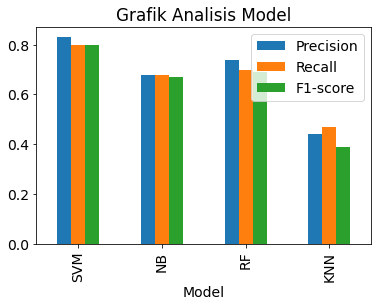

In [ ]:
# importing package
import pandas as pd

# create data
data_barplot = pd.DataFrame([['SVM', svm_prec, svm_rec, svm_f1], ['NB', nb_prec, nb_rec, nb_f1], ['RF', rf_prec, rf_rec, rf_f1],
				['KNN', knn_prec, knn_rec, knn_f1]],
				columns=['Model', 'Precision', 'Recall', 'F1-score'])
data_barplot['Precision'] = data_barplot['Precision'].astype(float)
data_barplot['Recall'] = data_barplot['Recall'].astype(float)
data_barplot['F1-score'] = data_barplot['F1-score'].astype(float)
# plot grouped bar chart
data_barplot.plot(x='Model',
		kind='bar',
		stacked=False,
		title='Grafik Analisis Model')


In [ ]:
acc_plot = pd.DataFrame([['SVM', svm_acc], ['NB', nb_acc], ['RF', rf_acc],
				['KNN', knn_acc]],
				columns=['Model', 'Akurasi'])

In [ ]:
acc_plot['Akurasi'] = acc_plot['Akurasi'].astype(float)

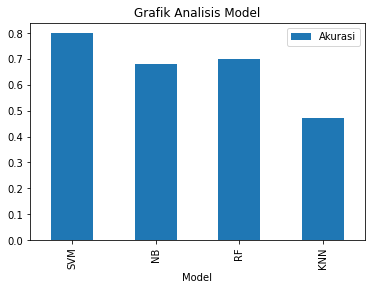

In [ ]:
acc_plot.plot(x='Model',
		kind='bar',
		stacked=False,
		title='Grafik Analisis Model')

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

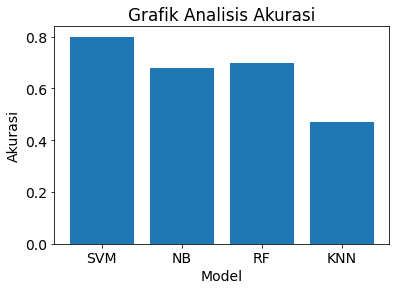

In [ ]:
barlist = plt.bar(acc_plot['Model'], acc_plot['Akurasi'])
plt.title('Grafik Analisis Akurasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()